<a href="https://colab.research.google.com/github/Marcelospirits/Analise-de-Dados-Vendas-com-Python/blob/main/Gabarito_Introdu%C3%A7%C3%A3o_Analise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução a Análise de Dados

### Como funciona um Projeto de Análise de Dados?

Os projetos de Análise de Dados são na verdade Desafios das Empresas

### Desafio

- Empresa Vende Bermudas
- 5 Lojas
- Está querendo aumentar as vendas
- O que fazer?
- Informações Disponíveis: Base de Vendas

### Passo 1 - Trazer sua base de dados para o Python e ver o que tem nela

In [3]:
import pandas as pd
from google.colab import files
import io

# 1. Upload do arquivo Excel
print("Selecione o seu arquivo .xlsx:")
uploaded = files.upload()
nome_do_arquivo = list(uploaded.keys())[0]

# 2. Lendo o Excel (Note que agora usamos read_excel)
try:
    # O Pandas identifica as abas automaticamente, mas garantimos a primeira
    tabela_vendas = pd.read_excel(io.BytesIO(uploaded[nome_do_arquivo]))
    print(f"✅ Arquivo Excel '{nome_do_arquivo}' carregado com sucesso!")
except Exception as e:
    print(f"❌ Erro ao ler o Excel: {e}")

# 3. Tratamento de Data
tabela_vendas['Data'] = pd.to_datetime(tabela_vendas['Data'])

display(tabela_vendas.head())

Selecione o seu arquivo .xlsx:


Saving Vendas.xlsx to Vendas (1).xlsx
✅ Arquivo Excel 'Vendas (1).xlsx' carregado com sucesso!


,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


### Passo 2 - Pegar um panorama geral sobre a sua base de dados

In [4]:
# Calculando os indicadores principais
faturamento_total = tabela_vendas['Valor Final'].sum()
quantidade_vendida = tabela_vendas['Quantidade'].sum()
ticket_medio = faturamento_total / quantidade_vendida

# Exibindo os resultados de forma organizada
print("📊 PANORAMA GERAL DE VENDAS")
print("-" * 30)
print(f"💰 Faturamento Bruto: R$ {faturamento_total:,.2f}")
print(f"📦 Volume de Vendas: {quantidade_vendida} unidades")
print(f"🎫 Ticket Médio por Item: R$ {ticket_medio:,.2f}")
print("-" * 30)

📊 PANORAMA GERAL DE VENDAS
------------------------------
💰 Faturamento Bruto: R$ 55,895.00
📦 Volume de Vendas: 350 unidades
🎫 Ticket Médio por Item: R$ 159.70
------------------------------


### Passo 3 - Começar sua análise Top -> Down

/tmp/ipython-input-252801353.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=faturamento_por_loja.reset_index(), x='Valor Final', y='ID Loja', palette='viridis')


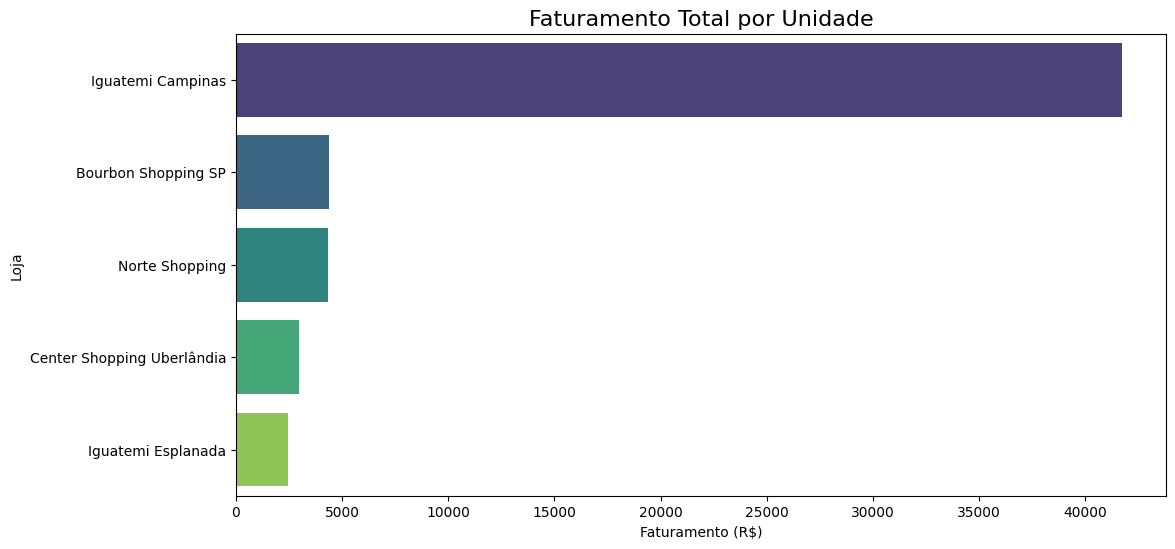

,Valor Final
ID Loja,
Iguatemi Campinas,41720
Bourbon Shopping SP,4386
Norte Shopping,4322
Center Shopping Uberlândia,2994
Iguatemi Esplanada,2473


In [5]:
# Agrupando o faturamento por Loja
faturamento_por_loja = tabela_vendas[['ID Loja', 'Valor Final']].groupby('ID Loja').sum().sort_values(by='Valor Final', ascending=False)

# Criando o gráfico para o seu portfólio (usando Seaborn para ficar mais bonito)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=faturamento_por_loja.reset_index(), x='Valor Final', y='ID Loja', palette='viridis')

plt.title('Faturamento Total por Unidade', fontsize=16)
plt.xlabel('Faturamento (R$)')
plt.ylabel('Loja')
plt.show()

# Exibindo a tabela logo abaixo
display(faturamento_por_loja)

### Passo 4 - Entrar no detalhe pra entender

In [8]:
# Criando uma tabela dinâmica: Produto nas linhas, Loja nas colunas
# Vamos somar o Valor Final para ver o impacto financeiro de cada item
analise_detalhada = tabela_vendas.pivot_table(index='Produto',
                                             columns='ID Loja',
                                             values='Valor Final',
                                             aggfunc='sum').fillna(0)

# Adicionando uma coluna de Total para facilitar a leitura
analise_detalhada['Total Produto'] = analise_detalhada.sum(axis=1)

# Ordenando pelo maior faturamento
analise_detalhada = analise_detalhada.sort_values(by='Total Produto', ascending=False)

# Exibindo o resultado
print("🎯 MATRIZ DE FATURAMENTO: PRODUTO vs LOJA")
display(analise_detalhada)

# Insight Automático
faturamento_liso_campinas = analise_detalhada.loc['Bermuda Liso', 'Iguatemi Campinas']
print(f"\n💡 DESCOBERTA CRÍTICA:")
print(f"O produto 'Bermuda Liso' faturou R$ {faturamento_liso_campinas:,.2f} em Campinas e ZERO nas outras lojas.")

🎯 MATRIZ DE FATURAMENTO: PRODUTO vs LOJA


ID Loja,Bourbon Shopping SP,Center Shopping Uberlândia,Iguatemi Campinas,Iguatemi Esplanada,Norte Shopping,Total Produto
Produto,,,,,,
Bermuda Liso,0.0,0.0,36581.0,0.0,0.0,36581.0
Bermuda Xadrez,465.0,1550.0,620.0,620.0,1085.0,4340.0
Bermuda Listrado,1793.0,326.0,1304.0,0.0,652.0,4075.0
Bermuda Linho,195.0,780.0,1170.0,1365.0,390.0,3900.0
Bermuda Estampa,1183.0,338.0,845.0,338.0,845.0,3549.0
Bermuda,750.0,0.0,1200.0,150.0,1350.0,3450.0



💡 DESCOBERTA CRÍTICA:
O produto 'Bermuda Liso' faturou R$ 36,581.00 em Campinas e ZERO nas outras lojas.
